In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from src.data.datasets import BasePosesDataset, FLAGSamples, RedockedData, DOCKING_DATA
import numpy as np
import os
import glob
import pandas as pd
import torch
from functools import cache
import datamol as dm

/home/cch57/micromamba/envs/poses/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/cch57/micromamba/envs/poses/lib/python3.11/site-packages/MDAnalysis/topology/TPRParser.py:161: DeprecationWarning: 'xdrlib' is deprecated and slated for removal in Python 3.13
  import xdrlib


In [3]:
docking_data = DOCKING_DATA

flag_generated = RedockedData('flag', 'score_only', docking_data)
flag_minimized = RedockedData('flag', 'minimized', docking_data)
flag_redocked = RedockedData('flag', 'redocked', docking_data)

decompdiff_generated = RedockedData('decompdiff', 'score_only', docking_data)
decompdiff_minimized = RedockedData('decompdiff', 'minimized', docking_data)
decompdiff_redocked = RedockedData('decompdiff', 'redocked', docking_data)

diffsbdd_generated = RedockedData('diffsbdd', 'score_only', docking_data)
diffsbdd_minimized = RedockedData('diffsbdd', 'minimized', docking_data)
diffsbdd_redocked = RedockedData('diffsbdd', 'redocked', docking_data)

targetdiff_generated = RedockedData('targetdiff', 'score_only', docking_data)
targetdiff_minimized = RedockedData('targetdiff', 'minimized', docking_data)
targetdiff_redocked = RedockedData('targetdiff', 'redocked', docking_data)

pocket2mol_generated = RedockedData('pocket2mol', 'score_only', docking_data)
pocket2mol_minimized = RedockedData('pocket2mol', 'minimized', docking_data)
pocket2mol_redocked = RedockedData('pocket2mol', 'redocked', docking_data)

ar_generated = RedockedData('ar', 'score_only', docking_data)
ar_minimized = RedockedData('ar', 'minimized', docking_data)
ar_redocked = RedockedData('ar', 'redocked', docking_data)

cvae_generated = RedockedData('cvae', 'score_only', docking_data)
cvae_minimized = RedockedData('cvae', 'minimized', docking_data)
cvae_redocked = RedockedData('cvae', 'redocked', docking_data)

crossdock_generated = RedockedData('crossdocked_test', 'score_only', docking_data)
crossdock_minimized = RedockedData('crossdocked_test', 'minimized', docking_data)
crossdock_redocked = RedockedData('crossdocked_test', 'redocked', docking_data)

In [19]:
clashes = flag_generated.all_clashes

In [31]:
flag_redocked.all_clashes

Calculating clashes...


flag_redocked:  18%|█▊        | 18/100 [01:16<05:31,  4.04s/it][20:06:28] WARNING: not removing hydrogen atom with neighbor that has non-tetrahedral stereochemistry
[20:06:28] WARNING: not removing hydrogen atom with neighbor that has non-tetrahedral stereochemistry
[20:06:28] WARNING: not removing hydrogen atom with neighbor that has non-tetrahedral stereochemistry
[20:06:28] WARNING: not removing hydrogen atom with neighbor that has non-tetrahedral stereochemistry
[20:06:28] WARNING: not removing hydrogen atom with neighbor that has non-tetrahedral stereochemistry
[20:06:28] WARNING: not removing hydrogen atom with neighbor that has non-tetrahedral stereochemistry
[20:06:28] WARNING: not removing hydrogen atom with neighbor that has non-tetrahedral stereochemistry
[20:06:28] WARNING: not removing hydrogen atom with neighbor that has non-tetrahedral stereochemistry
flag_redocked:  42%|████▏     | 42/100 [02:57<03:54,  4.04s/it][20:08:09] ERROR: Cannot process coordinates on line 2691


[[{'mol': <rdkit.Chem.rdchem.Mol at 0x2b7ee3d72b60>,
   'clashes': 0,
   'target': '2z3h'},
  {'mol': <rdkit.Chem.rdchem.Mol at 0x2b7ee3d88860>,
   'clashes': 6,
   'target': '2z3h'},
  {'mol': <rdkit.Chem.rdchem.Mol at 0x2b7ee3d70090>,
   'clashes': 2,
   'target': '2z3h'},
  {'mol': <rdkit.Chem.rdchem.Mol at 0x2b7ee3d70950>,
   'clashes': 0,
   'target': '2z3h'},
  {'mol': <rdkit.Chem.rdchem.Mol at 0x2b7ee3da3d80>,
   'clashes': 4,
   'target': '2z3h'},
  {'mol': <rdkit.Chem.rdchem.Mol at 0x2b7ee3d70310>,
   'clashes': 2,
   'target': '2z3h'},
  {'mol': <rdkit.Chem.rdchem.Mol at 0x2b7ee3d72750>,
   'clashes': 1,
   'target': '2z3h'},
  {'mol': <rdkit.Chem.rdchem.Mol at 0x2b7ee3d848b0>,
   'clashes': 0,
   'target': '2z3h'},
  {'mol': <rdkit.Chem.rdchem.Mol at 0x2b7edadc8c70>,
   'clashes': 6,
   'target': '2z3h'},
  {'mol': <rdkit.Chem.rdchem.Mol at 0x2b7ee3d70130>,
   'clashes': 2,
   'target': '2z3h'},
  {'mol': <rdkit.Chem.rdchem.Mol at 0x2b7ee3d70fe0>,
   'clashes': 1,
   'target

: 

In [24]:
clashes[0][:4]

[{'mol': <rdkit.Chem.rdchem.Mol at 0x2b7ee3b2d1c0>,
  'clashes': 256,
  'target': '2z3h'},
 {'mol': <rdkit.Chem.rdchem.Mol at 0x2b7ee3b2cdb0>,
  'clashes': 23,
  'target': '2z3h'},
 {'mol': <rdkit.Chem.rdchem.Mol at 0x2b7ee3b2fb00>,
  'clashes': 259,
  'target': '2z3h'},
 {'mol': <rdkit.Chem.rdchem.Mol at 0x2b7ee3b2c770>,
  'clashes': 256,
  'target': '2z3h'}]

In [28]:
list_clashes = []

for i in range(len(clashes)):
    list_clashes.extend([clash['clashes'] for clash in clashes[i]])

<Axes: >

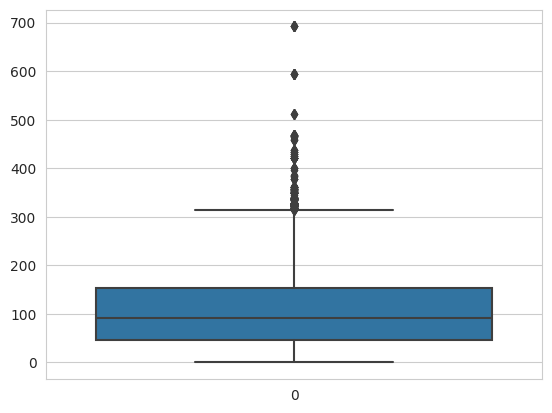

In [30]:
list_clashes = np.array(list_clashes)
sns.boxplot(list_clashes)